
# Part 3: Data Modelling with FBProphet
<b> FB ==> Facebook<br>
  &nbsp; &nbsp; &nbsp;   +<br>
Prophet ==> Open source software released by Facebook’s Core Data Science team. </b>
<br><br>
Inshort, Facebook's Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

### The Prophet Forecasting model
***y(t)= g(t) + s(t) + h(t) + εt <br>
g(t): trend component<br>
s(t): seasonality component<br>
h(t): holiday component<br>
εt: error term***
<br><br>
That's all for the brief introduction. Let's work on the model now.

In [62]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

Let's first try to fit FBProphet on our daily data. Since, we have multiple pollutants So we'll first work on PM2.5 data

In [133]:
# loading daily data of PM2.5
train_PM25 = pd.read_csv('dataset/daily/train/train_PM2.5.csv',parse_dates = [0])
test_PM25 = pd.read_csv('dataset/daily/test/test_PM2.5.csv',parse_dates = [0])

In [134]:
# let's print the first five rows of train_PM25
train_PM25.head()

,Date-Time,PM2.5
0,2013-03-01,6.458333
1,2013-03-02,28.750000
2,2013-03-03,104.750000
3,2013-03-04,22.875000
4,2013-03-05,131.833333


It's important to note that the FBProphet model requires data to be in specific format as given below.<br><br>
    <b>1) Data must contain two columns<br>
    2) First one should contain date-time and the column name must be 'ds'<br>
    3) Second one must contain actual data and column name must be 'y'</b>
    
    
 <br>
 Let's format the data accordingly.

In [135]:
# formatting data for FBProphet
train_PM25.columns = ['ds','y']
test_PM25.columns = ['ds','y']

In [136]:
# let's print first five rows of train_PM25 after formating
train_PM25.head()

,ds,y
0,2013-03-01,6.458333
1,2013-03-02,28.750000
2,2013-03-03,104.750000
3,2013-03-04,22.875000
4,2013-03-05,131.833333


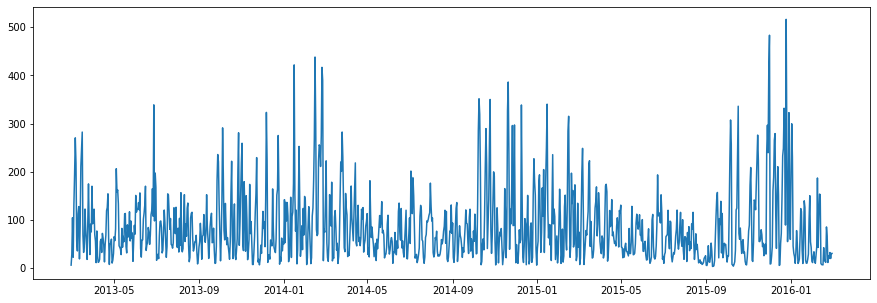

In [140]:
# let's plot our train data
plt.figure(figsize=(15,5))
plt.plot(train_PM25['ds'],train_PM25['y'])

Prophet model takes various parameters like seasonality, holidays, changepoints etc. Let's first try simple model.

In [141]:
# load model
model = Prophet()
# fit model to our train_PM25 data
model.fit(train_PM25)
# specify period and frequency of predictions
# (We need to predict daily data for next one year so period will be 365 and frequency will be 'D')
future = model.make_future_dataframe(periods=365, freq = 'D')
# Predict using the Prophet model
forecast = model.predict(future)
# let's print the forecast
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-01,94.838945,26.818911,214.104476,94.838945,94.838945,26.757653,26.757653,26.757653,5.553349,5.553349,5.553349,21.204304,21.204304,21.204304,0.0,0.0,0.0,121.596598
1,2013-03-02,94.824635,36.492270,216.184323,94.824635,94.824635,28.371459,28.371459,28.371459,8.476449,8.476449,8.476449,19.895011,19.895011,19.895011,0.0,0.0,0.0,123.196094
2,2013-03-03,94.810325,23.729470,199.458094,94.810325,94.810325,19.265833,19.265833,19.265833,0.685655,0.685655,0.685655,18.580178,18.580178,18.580178,0.0,0.0,0.0,114.076158
3,2013-03-04,94.796014,15.148194,197.287424,94.796014,94.796014,11.203794,11.203794,11.203794,-6.080551,-6.080551,-6.080551,17.284345,17.284345,17.284345,0.0,0.0,0.0,105.999809
4,2013-03-05,94.781704,15.113481,196.732292,94.781704,94.781704,15.192289,15.192289,15.192289,-0.837432,-0.837432,-0.837432,16.029721,16.029721,16.029721,0.0,0.0,0.0,109.973993
5,2013-03-06,94.767394,15.576668,195.470434,94.767394,94.767394,8.835046,8.835046,8.835046,-6.000742,-6.000742,-6.000742,14.835788,14.835788,14.835788,0.0,0.0,0.0,103.602439
6,2013-03-07,94.753084,14.688055,196.121037,94.753084,94.753084,11.922261,11.922261,11.922261,-1.796728,-1.796728,-1.796728,13.718989,13.718989,13.718989,0.0,0.0,0.0,106.675345
7,2013-03-08,94.738773,20.645546,200.359138,94.738773,94.738773,18.245853,18.245853,18.245853,5.553349,5.553349,5.553349,12.692504,12.692504,12.692504,0.0,0.0,0.0,112.984627
8,2013-03-09,94.724463,24.502377,207.720710,94.724463,94.724463,20.242556,20.242556,20.242556,8.476449,8.476449,8.476449,11.766107,11.766107,11.766107,0.0,0.0,0.0,114.967019
9,2013-03-10,94.710153,18.924974,202.239317,94.710153,94.710153,11.631778,11.631778,11.631778,0.685655,0.685655,0.685655,10.946123,10.946123,10.946123,0.0,0.0,0.0,106.341931


<b>Note: In the forecast table 'yhat' are the actual predictions. Lets plot the forecast.

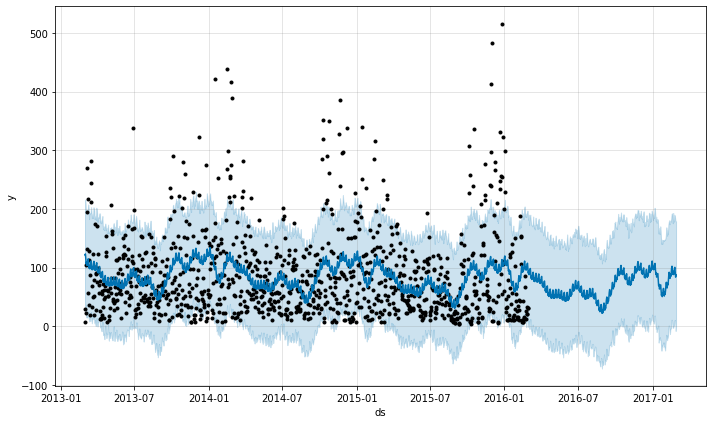

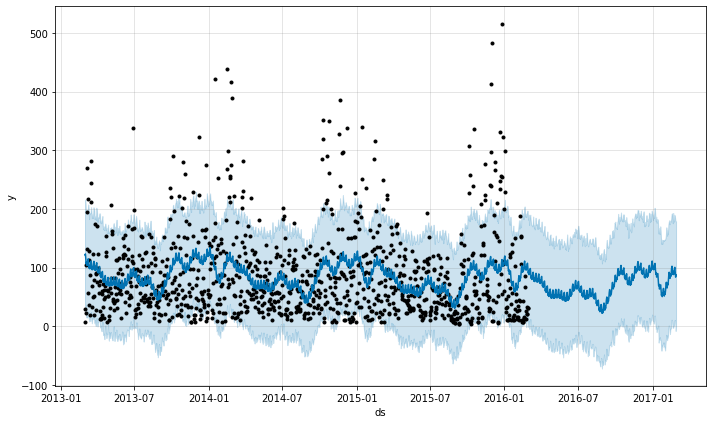

In [142]:
model.plot(forecast)

#### Visualizing the forecast:
-  Black dots are the data points(train data) used to train the model.<br>
-  The blue line in the graph represents the predicted values.<br>
-  Light blue line is the confidence interval<br><br>
As we can see our model didn't fit well with the data. Let's try to evaluate the model<br>

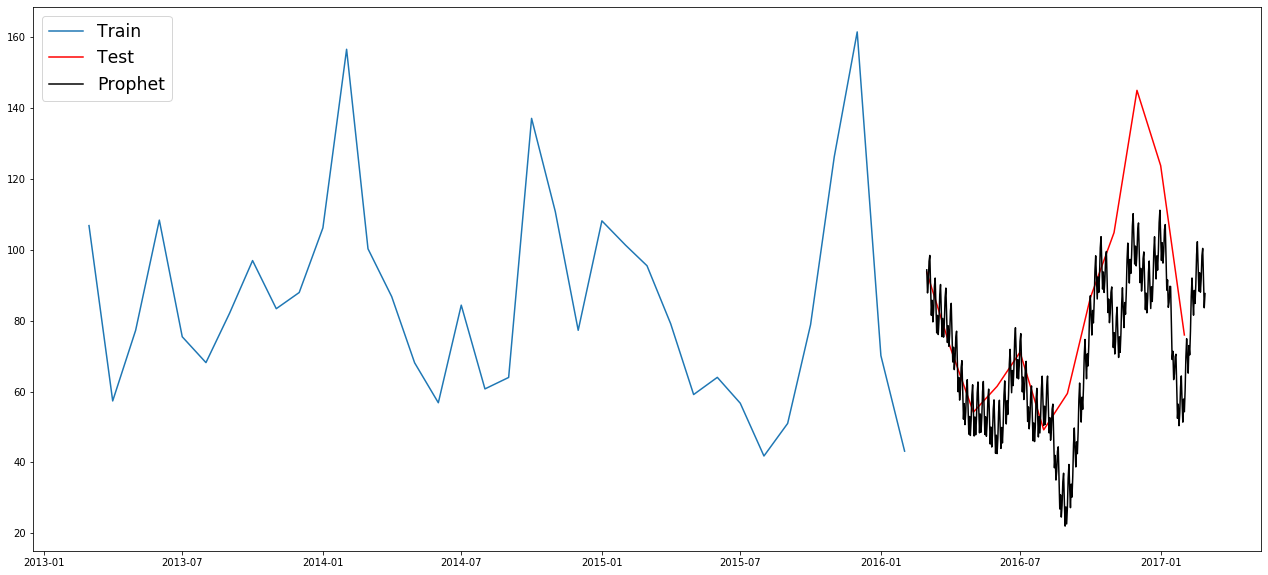

Root mean square error:  72.08367147867312


In [147]:
plt.figure(figsize=(22, 10))
# plot train data
plt.plot(train['ds'], train['y'], label='Train')
# plot test data
plt.plot(test['ds'], test['y'], label='Test', color='r')
# plot predictions
#   Note: Since We have to evalute last one year forecast, forecast['yhat'][-test_PM25.shape[0]:] gives last one year forecast points
plt.plot(forecast['ds'][-test_PM25.shape[0]:], forecast['yhat'][-test_PM25.shape[0]:], label='Prophet', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()
# calcuate rmse
print('Root mean square error: ',np.sqrt(mean_squared_error(forecast['yhat'][-test_PM25.shape[0]:].reset_index(drop = True), test_PM25['y'])))

Let's tune the model now. First we will try to add seasonality to the model.